In [1]:
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from simul import (
    in_femto_sec, in_electron_volt, to_femto_sec, to_electron_volt,
    ispeak, HeWavePackets,
)

In [2]:
wave = HeWavePackets.in_experimental_units(
    sigma=90,  # fwhm of a pulse in fs
    k0=24.491,  # (24.475+24.507)/2 eV
    dt=387.72,  # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
    phi=180,  # deg
)
t = np.linspace(
    in_femto_sec(-200),
    in_femto_sec(1800),
    1001,
)
k = np.linspace(
    in_electron_volt(24.4),
    in_electron_volt(24.6),
    1001,
)
wavesq = wave(t)

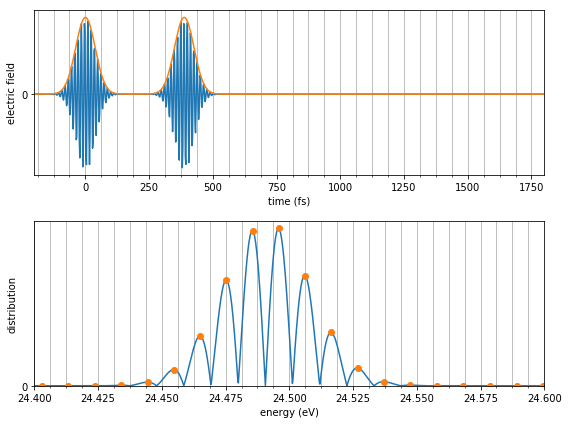

Local maximums at:
    diff:  0.011 eV
       0: 24.403 eV
       1: 24.413 eV
       2: 24.424 eV
       3: 24.434 eV
       4: 24.444 eV
       5: 24.455 eV
       6: 24.465 eV
       7: 24.475 eV
       8: 24.486 eV
       9: 24.496 eV
      10: 24.506 eV
      11: 24.516 eV
      12: 24.527 eV
      13: 24.537 eV
      14: 24.547 eV
      15: 24.558 eV
      16: 24.568 eV
      17: 24.579 eV
      18: 24.589 eV
      19: 24.600 eV


In [3]:
# fig1-1
plt.figure(figsize=(8,6))
plt.subplot(211)
plt.xlabel('time (fs)')
plt.ylabel('electric field')
plt.plot(to_femto_sec(t), wave.pulses(t))
plt.plot(to_femto_sec(t), wave.pulsesabc(t))
plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
plt.yticks([0], [0])
plt.minorticks_on()
plt.grid(True, which='both')


# fig1-2
y = np.abs(wave.pulses_k(k))
w = ispeak(y)

plt.subplot(212)
plt.xlabel('energy (eV)')
plt.ylabel('distribution')
plt.plot(to_electron_volt(k), y)
plt.plot(to_electron_volt(k)[w], y[w], 'o')
plt.xlim(to_electron_volt(k[0]), to_electron_volt(k[-1]))
plt.ylim(0, None)
plt.yticks([0], [0])
plt.minorticks_on()
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

print("""\
Local maximums at:
    diff: {:6.3f} eV
    {}""".format(
        to_electron_volt(2*np.pi/wave.dt),
        "\n    ".join(f"{i:>4d}: {v:6.3f} eV" for i, v in enumerate(to_electron_volt(k[w]))),
    )
)

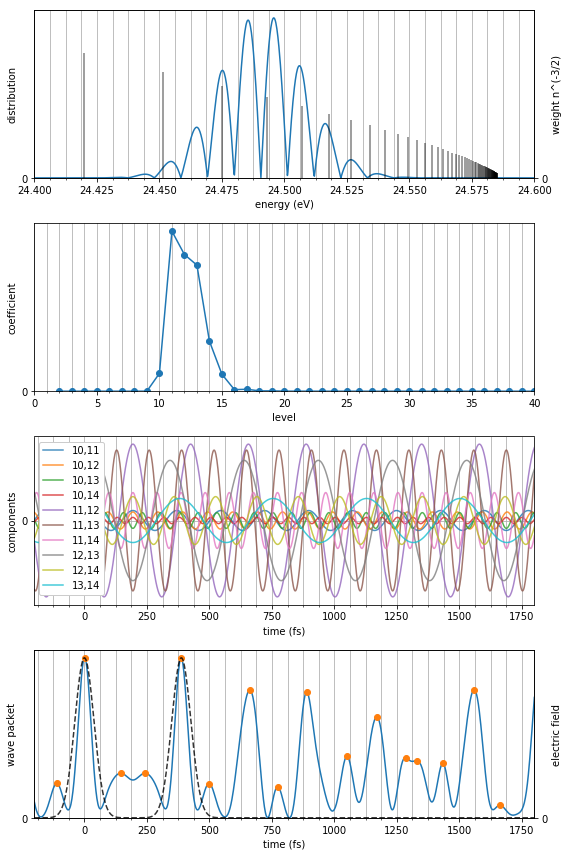

Local maximums at:
       0:   -110 fs
       1:      2 fs
       2:    146 fs
       3:    244 fs
       4:    388 fs
       5:    500 fs
       6:    662 fs
       7:    774 fs
       8:    890 fs
       9:   1052 fs
      10:   1170 fs
      11:   1286 fs
      12:   1330 fs
      13:   1434 fs
      14:   1560 fs
      15:   1662 fs


In [4]:
# fig1-1
plt.figure(figsize=(8,12))
plt.subplot(411)
plt.xlabel('energy (eV)')
plt.ylabel('distribution')
plt.plot(to_electron_volt(k), np.abs(wave.pulses_k(k)))
plt.xlim(to_electron_volt(k[0]), to_electron_volt(k[-1]))
plt.ylim(0, None)
plt.yticks([0], [0])
plt.minorticks_on()
plt.grid(True, which='both')


# fig1-2
plt.twinx()
plt.ylabel('weight n^(-3/2)')
plt.vlines(
    to_electron_volt(wave.target_klev),
    0,
    wave.target_nlev ** -1.5,
    alpha=0.5,
)
plt.ylim(0, 0.05)
plt.yticks([0], [0])


# fig2
plt.subplot(412)
plt.xlabel("level")
plt.ylabel("coefficient")
plt.plot(wave.target_nlev, np.abs(wave.target_poplev()), '-o')
plt.xlim(0, 40)
plt.ylim(0, None)
plt.yticks([0], [0])
plt.minorticks_on()
plt.grid(True, which='both')


# fig3
n = wave.target_nlev

plt.subplot(413)
plt.xlabel("time (fs)")
plt.ylabel("components")
for i, j in combinations(
            np.argwhere((10<=n) & (n<=14)).reshape(-1), 2
        ):
    plt.plot(to_femto_sec(t), wavesq[:, i, j], alpha=0.8, label=f'{n[i]},{n[j]}')
plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
plt.yticks([0], [0])
plt.minorticks_on()
plt.grid(True, which='both')
plt.legend(loc='upper left', framealpha=1, ncol=1)


# fig4-1
y = np.abs(wavesq.sum((1,2)))
w = ispeak(y)

plt.subplot(414)
plt.xlabel("time (fs)")
plt.ylabel("wave packet")
plt.plot(to_femto_sec(t), y)
plt.plot(to_femto_sec(t[w]), y[w], 'o')
plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
plt.ylim(0, None)
plt.yticks([0], [0])
plt.minorticks_on()
plt.grid(True, which='both')


# fig4-2
plt.tight_layout()
plt.twinx()
plt.ylabel('electric field')
plt.plot(to_femto_sec(t), wave.pulsesabc(t), 'k--', alpha=0.8)
plt.ylim(0, None)
plt.yticks([0], [0])
plt.show()

print("""\
Local maximums at:
    {}""".format(
        "\n    ".join(f"{i:>4d}: {v:6.0f} fs" for i, v in enumerate(to_femto_sec(t[w]))),
    )
)